In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('..')
import ronan
import chainer
import graphviz

In [20]:
net = ronan.ResNet50(finetune_only=False)

In [21]:
random_input = net.xp.random.random((1, 3, 224, 224)).astype(net.xp.float32)
random_output = net(random_input)
graph = chainer.computational_graph.build_computational_graph(random_output)
graph

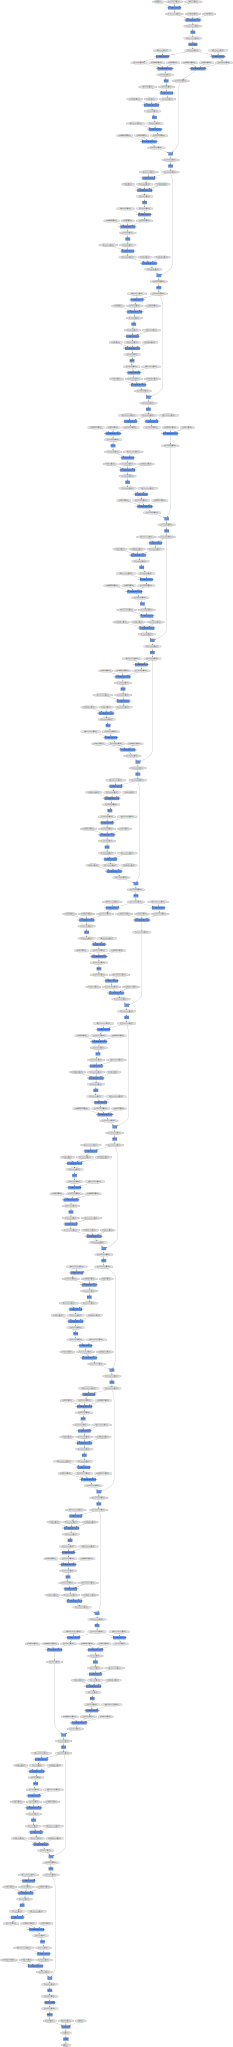

In [26]:
graphviz.Source(graph.dump())

In [25]:
list(net.resnet50.namedlinks())

[('/', <chainer.links.model.vision.resnet.ResNet50Layers at 0x7f83f8e603d0>),
 ('/fc6', <chainer.links.connection.linear.Linear at 0x7f83f8e3de90>),
 ('/res2',
  <chainer.links.model.vision.resnet.BuildingBlock at 0x7f83f8e60ad0>),
 ('/res2/a',
  <chainer.links.model.vision.resnet.BottleneckA at 0x7f83f8e604d0>),
 ('/res2/a/bn3',
  <chainer.links.normalization.batch_normalization.BatchNormalization at 0x7f83f8e47150>),
 ('/res2/a/bn2',
  <chainer.links.normalization.batch_normalization.BatchNormalization at 0x7f83f8e4de90>),
 ('/res2/a/bn1',
  <chainer.links.normalization.batch_normalization.BatchNormalization at 0x7f83f8e60c10>),
 ('/res2/a/bn4',
  <chainer.links.normalization.batch_normalization.BatchNormalization at 0x7f83f8e608d0>),
 ('/res2/a/conv3',
  <chainer.links.connection.convolution_2d.Convolution2D at 0x7f83f8e47250>),
 ('/res2/a/conv2',
  <chainer.links.connection.convolution_2d.Convolution2D at 0x7f83f8e4df50>),
 ('/res2/a/conv1',
  <chainer.links.connection.convolution_

In [32]:
net.resnet50.available_layers

['conv1', 'pool1', 'res2', 'res3', 'res4', 'res5', 'pool5', 'fc6', 'prob']

In [33]:
net.resnet50.functions

OrderedDict([('conv1',
               <function chainer.functions.activation.relu.relu>]),
             ('pool1',
              [<function chainer.links.model.vision.resnet.<lambda>>]),
             ('res2',
              [<chainer.links.model.vision.resnet.BuildingBlock at 0x7f83f8e60ad0>]),
             ('res3',
              [<chainer.links.model.vision.resnet.BuildingBlock at 0x7f83f8e60a10>]),
             ('res4',
              [<chainer.links.model.vision.resnet.BuildingBlock at 0x7f83f8e60b90>]),
             ('res5',
              [<chainer.links.model.vision.resnet.BuildingBlock at 0x7f83f8e188d0>]),
             ('pool5',
              [<function chainer.links.model.vision.resnet._global_average_pooling_2d>]),
             ('fc6',
              [<chainer.links.connection.linear.Linear at 0x7f83f8e3de90>]),
             ('prob',
              [<function chainer.functions.activation.softmax.softmax>])])

In [34]:
# see https://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006

In [35]:
# conclusion: I could finetune from the output of res4

In [ ]:
net.resnet50.__call__